Copyright 2021 Amazon.com and its affiliates; all rights reserved. This file is AWS Content and may not be duplicated or distributed without permission

# Demonstrating feature lineage with Amazon SageMaker Feature Store

#### Feature lineage in the overall ML lifecycle
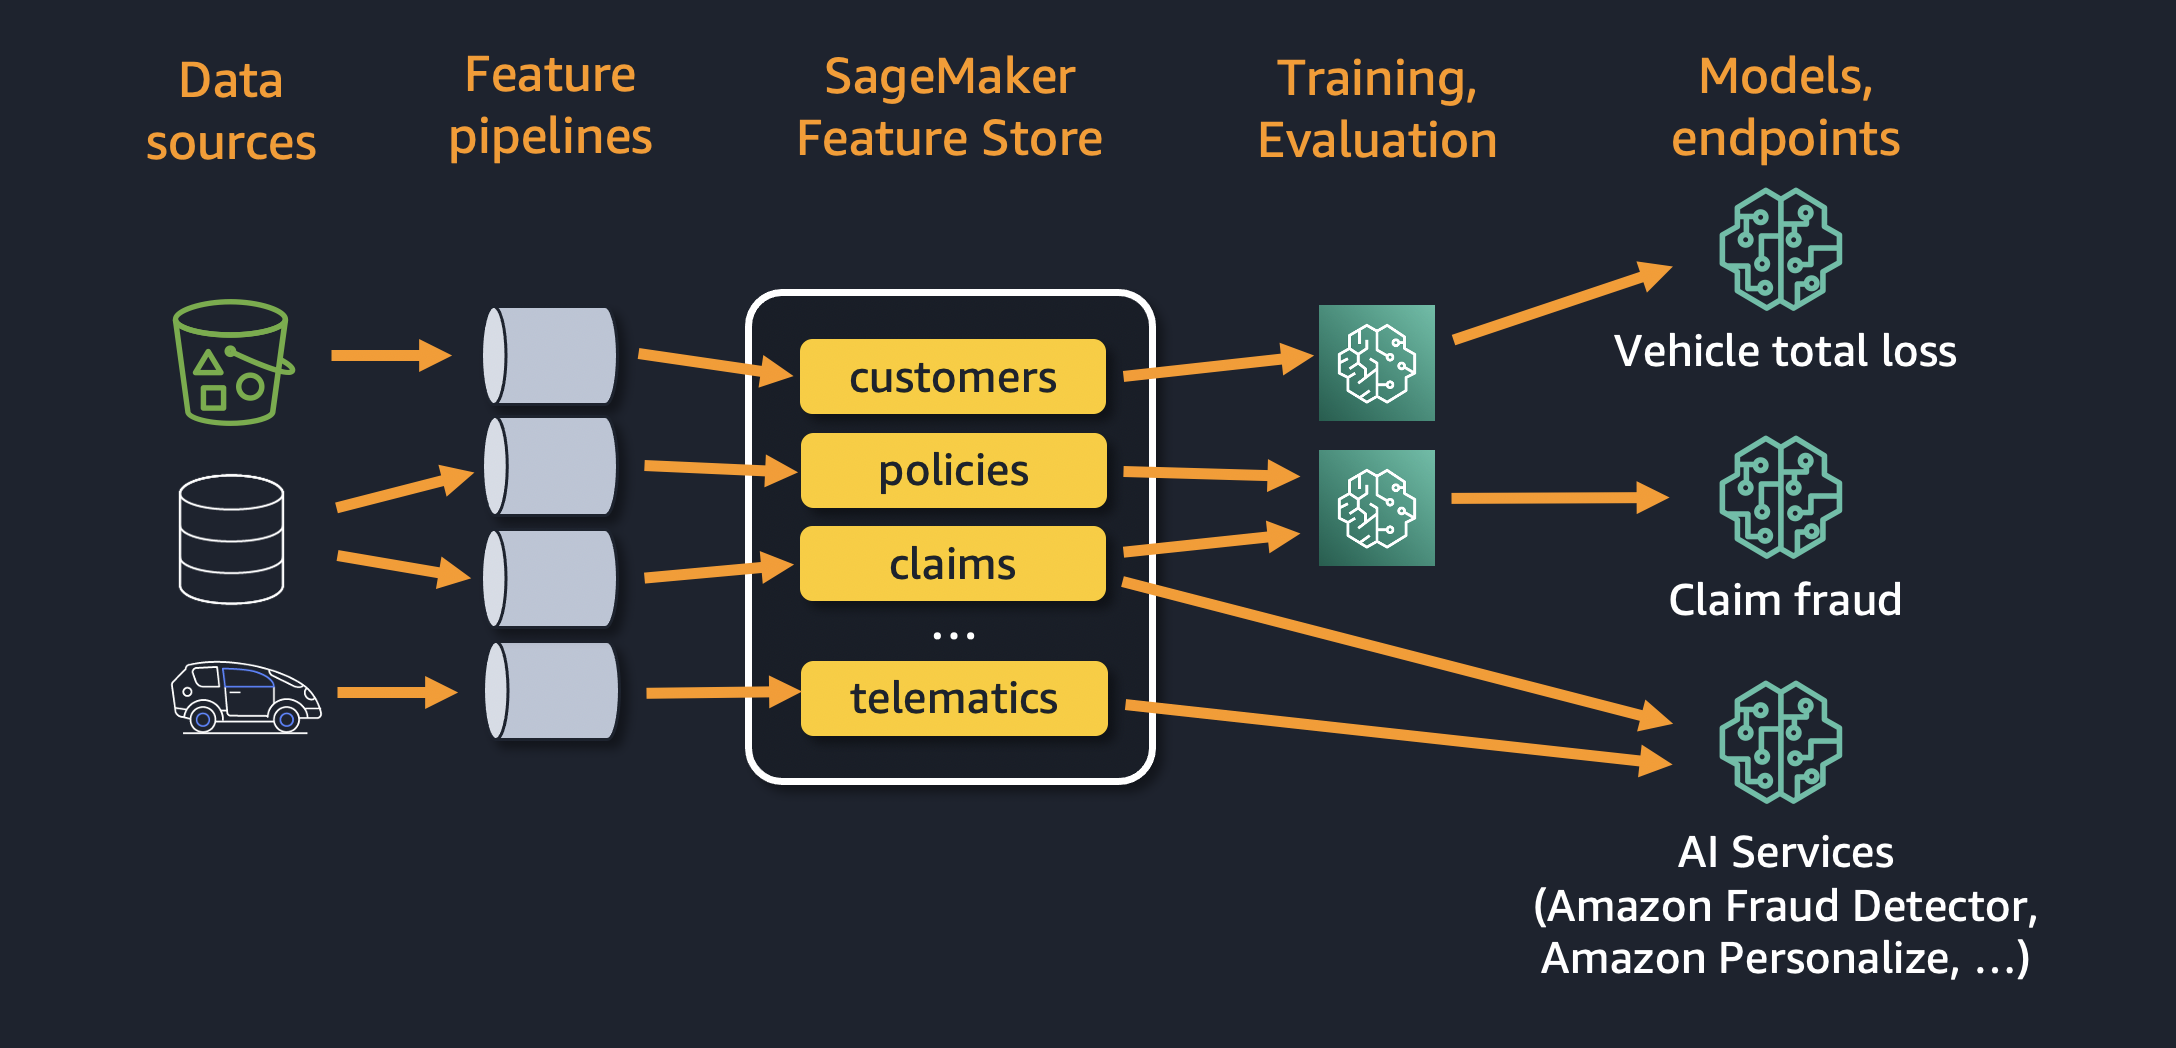

In [ ]:
#%pip install boto3
#%pip install --upgrade pip
#Uncomment the above only if you have python or boto3 errors

In [ ]:
import pandas as pd
import os
import sys
import time
import sagemaker
import random
import boto3
import numpy as np
import math
from time import gmtime, strftime

In [ ]:
notebook_dir = os.getcwd()
package_dir = notebook_dir + '/ml-lineage-helper'
sys.path.append(package_dir)

In [ ]:
%load_ext autoreload
%autoreload 2
# from feature_store import *
from ml_lineage_helper import *
from ml_lineage_helper.ml_lineage_helper.query_lineage import *


**Session variables**

In [ ]:
role_arn = sagemaker.get_execution_role()
try:
    role_name=role_arn.split('/')[2]
except:
    role_name=role_arn.split('/')[1]

sagemaker_session = SageMakerSession()
s3_prefix = 'ml-lineage-synthetic-housing-2'
model_name = 'pytorch-hosted-model-v9'

If you want to get the lineage of any SageMaker model, you can use the following snippet of code.

In [ ]:
lineage = MLLineageHelper(sagemaker_model_name_or_model_s3_uri=model_name)

In [ ]:
lineage.graph()

In [ ]:
pd.set_option('display.max_colwidth', None)
lineage.df

## Lineage queries

If you have a data source, you can find associated Feature Groups by providing the data source's S3 URI or Artifact ARN:

In [ ]:
query_lineage = QueryLineage()
fgs_df = query_lineage.get_feature_groups_from_data_source(f's3://{sagemaker_session.bucket_name}/{s3_prefix}/train.npy')
fgs_df

You can also start with a Feature Group, and find associated data sources:

In [ ]:
fg_arn = fgs_df['Feature Group ARN'].values[0]

In [ ]:
query_lineage.get_data_sources_from_feature_group(fg_arn,
                                                  max_depth=3)

Given a Feature Group, you can also find associated models:

In [ ]:
query_lineage.get_models_from_feature_group(fg_arn).head(4)

Given a SageMaker model name or artifact ARN, you can find associated Feature Groups.

In [ ]:
query_lineage.get_feature_groups_from_model(model_name)